# Latent Semantic Analysis (LSA)



In [35]:
import pandas as pd
import numpy as np
import re
import nltk

from nltk.corpus import reuters
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import requests
from io import BytesIO
import zipfile

# Download and extract the titles.zip file
url = "https://github.com/febse/data/raw/refs/heads/main/ta/titles.zip"
response = requests.get(url)
zip_file = zipfile.ZipFile(BytesIO(response.content))

# Extract the text file (assuming there's a .txt file in the zip)
file_names = zip_file.namelist()
print("Files in zip:", file_names)

# Read the first text file
text_file_name = [f for f in file_names if f.endswith('.txt')][0]
text_content = zip_file.read(text_file_name).decode('utf-8')

# Split into lines
titles = text_content.split('\n')
titles = [line.strip() for line in titles if line.strip()]  # Remove empty lines

print(f"Number of lines: {len(titles)}")
print(f"First 5 lines:")
for i, line in enumerate(titles[:5], 1):
    print(f"{i}: {line}")

Files in zip: ['titles.txt']
Number of lines: 2373
First 5 lines:
1: Philosophy of Sex and Love A Reader
2: Readings in Judaism, Christianity, and Islam
3: Microprocessors Principles and Applications
4: Bernhard Edouard Fernow: Story of North American Forestry
5: Encyclopedia of Buddhism


In [38]:
# We will remove the numbers from the text, because here these are very common in every article and obfuscate
# the results

tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words="english",
    token_pattern=r'\b[a-zA-Z]{2,}\b'  # Only words with at least 2 letters
)

term_doc_matrix = tfidf.fit_transform(titles)

term_doc_df = pd.DataFrame(
    term_doc_matrix.toarray(),
    columns=tfidf.get_feature_names_out()
)

## Should probably remove numbers
term_doc_df.head()

,abbas,abnormal,abridged,absolute,absraction,abstraction,abstractions,abundance,acc,access,...,wsj,xilinx,year,years,youbook,young,youth,zen,zionism,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
term_doc_df.shape

(2373, 2272)



Example document-term matrix:

| Documents/Terms | house | oil  | wage |
|-----------------|-------|------|------|
| Doc1 (housing)  | 1.43  | 0.02 | 0.3  |
| Doc2 (income)   | 0.4   | 0.01 | 1.2  |
| Doc3 (heat)     | 0.35  | 1.7  | 0.04 |

Example terms-topic matrix: values indicate how strongly a word is related to a topic.

| Word/Topic | housing | income | heat |
|------------|---------|--------|------|
| house      | 1.43    | 0.022  | 0.34 |
| wage       | 0.14    | 2.01   | 0.25 |
| oil        | 0.35    | 0.21   | 1.12 |

Example document-topic matrix: the values in this matrix indicate how strongly
a document is related to a topic.

| Document/Topic | housing | income | heat |
|----------------|---------|--------|------|
| Doc1 (housing) | 1.43    | 0.01   | 0.21 |
| Doc2 (income)  | 0.14    | 2      | 0.25 |
| Doc3 (heat)    | 0.38    | 0.21   | 1.17 |


The singular values indicate how strongly a topic contributes to explaining
the data (term-document frequencies).

| Topic   | singular value |
|---------|----------------|
| housing | 6.2            |
| wage    | 2.3            |
| oil     | 0.02           |


In [ ]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(n_components=2, n_iter=100, random_state=42)
lsa_result = lsa.fit_transform(term_doc_df)
Sigma = lsa.singular_values_
V_T = lsa.components_.T
V_T

array([[ 3.47675815e-04, -1.80493967e-04],
       [ 1.24286690e-02, -8.21788956e-03],
       [ 9.59384736e-04, -6.05168670e-04],
       ...,
       [ 2.06052125e-04,  4.33947563e-04],
       [ 2.29582790e-04,  1.38724948e-04],
       [ 1.56371113e-05,  6.12045673e-06]], shape=(2272, 2))

<Axes: >

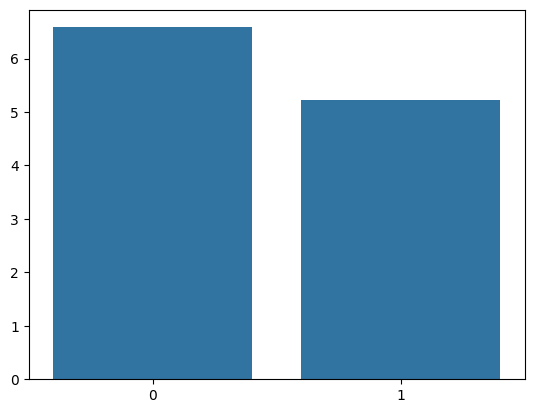

In [42]:
sns.barplot(x=list(range(len(Sigma))), y = Sigma)

In [28]:
term_topic_matrix = pd.DataFrame(data=V_T,
                                 index=term_doc_df.columns,
                                 columns = [f'Component {r}' for r in range(0,V_T.shape[1])])
term_topic_matrix

,Component 0,Component 1
abbas,0.000348,-0.000180
abnormal,0.012429,-0.008218
abridged,0.000959,-0.000605
absolute,0.004614,-0.001164
absraction,0.000521,0.000125
...,...,...
young,0.000706,-0.000627
youth,0.000158,0.000023
zen,0.000206,0.000434
zionism,0.000230,0.000139


In [19]:
# Plotly create a 3D scatter plot
fig = px.scatter_3d(df_black, x='x', y='y', z='z', size_max=3)
fig.update_traces(marker=dict(size=3))  # Reduce the size of the points
fig.show()

NameError: name 'df_black' is not defined

In [39]:
lsa_result.shape

(1000, 3)

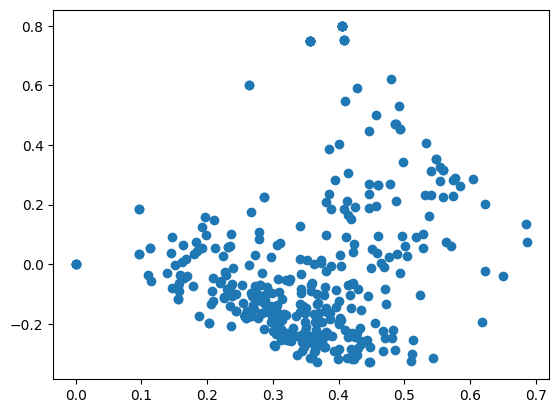

In [29]:
# Plot the first two components of the last SVD

plt.scatter(lsa_result[:, 0], lsa_result[:, 1])